 # Applied Economic Analysis 1 - Final Assignment 
 


                                               |Athulya Thattuparambil Anilkumar|2027127|
                                               
                                               
                                               

 # Solow  Model and  UK Economy  <a name="top"></a>
 
The Solow Model explains long run economic growth through capital accumulation, population growth and technological progress. Robert M. Solow fitted available US data with some success from periods 1909-1949, for which he was awarded the Nobel Prize in Economics. In this assignment I try to do the same, by trying to see how the Solow Model fits the UK economy data. Specifically I try to replicate the wealth income ratios found in  [Piketty and Zucman(2014)](http://piketty.pse.ens.fr/files/PikettyZucman2013WP.pdf).I start by observing trends in the different parameters of the model , and then using those to refine the Solow Model to fit Piketty's data. Further I introduce modification to the model to see whether it predicts the data better.Finally I assess how sensitive the model is to the capital share ratios. The timeline I am considering for the UK economy is 1870-2010. The objective  is to observe trends in the capital income ratios for the UK economy over the period of 1870 to 2010. 

The assignment structured in the following way : 

1.<a href="#facts">Stylized Facts</a>

2.<a href="#calibration">Calibration</a>

3.<a href="#refine">Refining the Model</a>

4.<a href="#CES">CES Model</a>

5.<a href="#sensitivity">Sensitivity Analysis</a>

6.<a href="#remarks">Final Remarks</a>

In [121]:
# We start by importing necessary libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Stylized Facts <a name="facts"></a>


Some facts we first analyze include the capital income ratios, population growth rates, savings rate, depreciation rates,housing sahres, land shares and technological progress. Some of this data was obtained through Piketty's datafile and the [OECD database](https://data.oecd.org/).

In [122]:
#importing th excel file with data 
xl_file =pd.ExcelFile("/home/u738709/AEA_2018/SummaryStatistics.xlsx")

In [123]:
# extracting the necessary sheet from the excel file 
summary = xl_file.parse('Sheet1')

In [124]:
summary.tail()

,Year,Rates of Technological Progress,Population Growth Rate,Housing Share,Land Share,Capital Share,Wealth Income Ratio,Savings Rate,Interest Rate,Depreciation Rate
136,2006,1.322951,0.690600,38.815544,0.724766,30.582370,546.638182,3.630114,4.501675,12.384891
137,2007,0.899227,0.798717,39.894210,0.676008,32.025658,550.231920,5.521159,5.011275,12.138431
138,2008,-0.754347,0.827617,40.225844,0.697462,32.217463,514.077799,5.769648,4.590725,11.520952
139,2009,-3.188998,0.723720,39.546148,0.713151,28.319837,518.041821,1.720027,3.647517,12.711854
140,2010,1.498287,0.799225,39.908956,0.668991,29.949850,522.554827,2.086579,3.624425,12.445864


Above you see the data for the last five years in the UK economy.For techonological progress I used the multi-factor productivity of growth as a proxy which is available only from 1985 onwards.I now indicate which columns will be necessary for the analysis.


In [192]:
#Since all the rates are in percentage terms,I change them by dividing all the rates by 100 and saving them onto a list
Technology =summary['Rates of Technological Progress']/100
Population =summary['Population Growth Rate']/100
Savings = summary['Savings Rate']/100
Depreciation = summary['Depreciation Rate']/100
Year = summary ['Year']
Capital =summary['Capital Share ']/100
WealthIncome= summary['Wealth Income Ratio ']
Housing=summary['Housing Share']/100
Land=summary['Land Share']/100

In [126]:
# Combining the necessary stylized facts for the initial model 
stylized = [Year,Technology, Population, Savings, Capital,Land,Housing]
result = pd.concat(stylized, axis=1)
result.tail()

,Year,Rates of Technological Progress,Population Growth Rate,Savings Rate,Capital Share,Land Share,Housing Share
136,2006,0.013230,0.006906,0.036301,0.305824,0.007248,0.388155
137,2007,0.008992,0.007987,0.055212,0.320257,0.006760,0.398942
138,2008,-0.007543,0.008276,0.057696,0.322175,0.006975,0.402258
139,2009,-0.031890,0.007237,0.017200,0.283198,0.007132,0.395461
140,2010,0.014983,0.007992,0.020866,0.299499,0.006690,0.399090


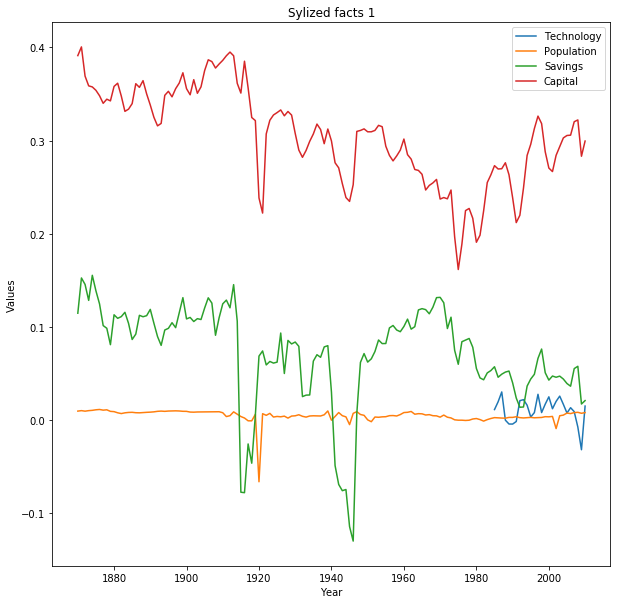

In [127]:
#Plotting the graph of the stylizd facts 
plt.figure(figsize=(10,10))
plt.plot(Year,Technology,label='Technology')
plt.plot(Year,Population,label='Population')
plt.plot(Year,Savings,label='Savings')
plt.plot(Year,Capital,label='Capital')
plt.xlabel('Year')
plt.ylabel('Values')
plt.title('Sylized facts 1')
plt.legend()
plt.show()

The rates of technological progress fluctuates between 3% and -3% , while we see signicant decrease in the rate of population in 1920. This is due to the Irish independence. Other relevant changes in population occured during the war periods where it decreases. Savings rate and capital share decreased during the war periods around 1917 and 1942. But after 1950 savings rate show a sharp increase while capital shares increase steadily. Piketty and Zucman indicate abolishment of capital unfriendly policies to have contributed to this rise in capital share.  

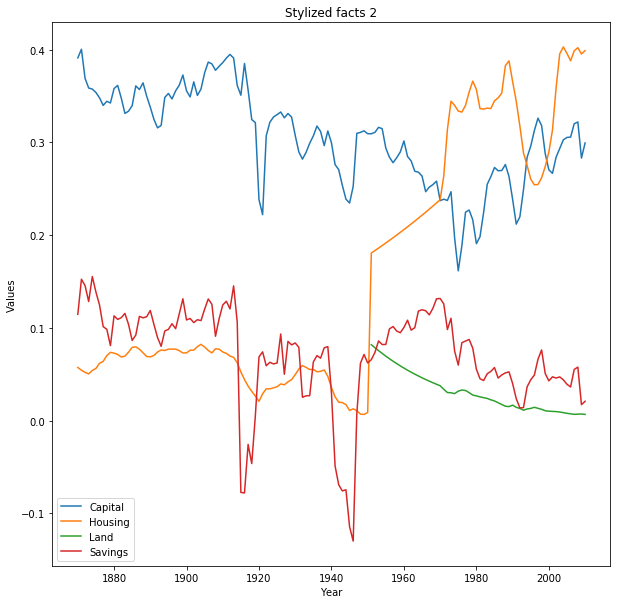

In [128]:
#plotting housing land and capital share into one 
plt.figure(figsize=(10,10))
plt.plot(Year,Capital,label='Capital')
plt.plot(Year,Housing,label='Housing')
plt.plot(Year,Land,label='Land')
plt.plot(Year,Savings,label='Savings')
plt.xlabel('Year')
plt.ylabel('Values')
plt.title('Stylized facts 2')
plt.legend()
plt.show()

There is a huge spike in housing share after 1950s. After the WWII we see savings rate spiked around 1950 and capital shares increase after 1970. Since data for land share was available for 1960 onwards, we see a trend line starting at 1960. 

# Calibration
<a name="calibration"></a>

Now we calibrate the Solow Model. The Solow Model production function is a Cobb- Douglas porduction function with capital (K) , labour (L) , and technology (A) as inputs :

$$Y = K^α AL^{1-α} $$

where α is the capital share 

Main assumptions of the Solow Model include : 

1. Given a fixed stock of labor, capital and tehcnology in period 1 
2. No government or international trade 
3. All factors of production are fully employed

In the model capital and labor accumulates, and the diminishing returns are offset by technological progress. the steay state levels in the model are affected by the parameters, while technological progress affects the growth rate of the economy exogenously. The model behaves in such way that there are constant returns to scale and their marginal productivity are positive. The Solow model accumulates capital : $$K˙ = sY − dK$$

where:

s is the savings rate 

d is the depreciation rates 

The main assumption here is that there is a constant savings rate and a constant depreciation rate. The model produces a lot of attributes of the economy following :
$$KY = K/Y$$
$$YAL = Y/(AL)$$
$$KAL = K/(AL)$$

where : 

K/Y is the capital income ratio 

YAL is the output per efficient labor 

KAL is  the capital per efficient labor 

the parameters that the model is dependent on include : 

s : savings rate 

d : depreciation rates

n : population growth rate

gA :technological growth rate 

In this assignment I am mainly going to focus on K/Y ratios, in order to compare it to Piketty's data. I assume the K/Y ratio is the equivalent of Wealth Income ratios of the UK economy found in Piketty's paper. 


Since these parameters are constant they are calculated by taking the average of the emprical data presented above. I assume that the model begins at steady state levels. Initial K and A is assumed to be 1. To begin at the steady state level output I covert the inital labor input to be 1/k where k is the steady state level kappa: 
$$k =((n+d+gA)/s)^{1-a})$$

Below I run the model over 141 periods(1870-2010) to produce attributes of the Solow Model. 

In [129]:
#introducing parameters into the model by taking mean of the emperical data:  
s =np.mean(Savings)
a = np.mean(Capital)
d =np.mean(Depreciation)
gA = np.mean(Technology)
n =np.mean(Population)

In [130]:
parameters = {'s':s, 'a':a,'d':d, 'gA':gA,'n':n}
parameters

{'a': 0.30543084864775283,
 'd': 0.08453808952419091,
 'gA': 0.010687113846153848,
 'n': 0.004815035848525151,
 's': 0.07166375341956335}

In [131]:
#calculating the steady state kappa 
k=((n+d+gA)/s)**(1/(a-1))

The code below creates values for all the variables in the Solow model for 141 periods, which is for the years 1870-2010. Relevant attributes I chose inluce labor, technology, capital,savings, depreciated capital, output, wealth income ratio, output per efficient labor,and capital per efficient labor. 

In [132]:
years=141 # defining the total period and the total number of values created 

In [133]:
#defining the variables to accumulate over the periods 
L=np.zeros(years)#labor
A=np.zeros(years)#technology
K=np.zeros(years)#capital
sY=np.zeros(years)#savings 
dK=np.zeros(years)#depreciated capital
Y=np.zeros(years)#output
KY=np.zeros(years)#wealth income ratio/ capital income ratio
YAL=np.zeros(years)#output per effcient labor 
KAL=np.zeros(years)#capital per efficient labor 

In [134]:
# Running a loop to produce values for all variables.  
for i in range (years):
    if i==0:#L,A and K for period 1 are fixed and they accumulate over the rest of the periods.
        L[i]=1/k
        A[i]=1
        K[i]=1
        Y[i]=K[i]**a*((L[i]*A[i])**(1-a))
        sY[i]=s*Y[i]
        dK[i]=d*K[i]
        KY[i]=K[i]/Y[i]
        YAL[i]=Y[i]/(A[i]*L[i])
        KAL[i]=K[i]/(A[i]*L[i])
    else:
        #L , A, K is dependent on the values of the previous period
        L[i]=L[i-1]*(1+n)
        A[i]=A[i-1]*(1+gA)
        K[i]=K[i-1]+(s*Y[i-1])-(d*K[i-1])
        Y[i]=K[i]**a*((L[i]*A[i])**(1-a))
        sY[i]=s*Y[i]
        dK[i]=d*K[i]
        KY[i]=K[i]/Y[i]
        YAL[i]=Y[i]/(A[i]*L[i])
        KAL[i]=K[i]/(A[i]*L[i])

In [135]:
# turning the output into a data frame called solow
solowdf ={'L':L,'A':A, 'K':K, 'Y':Y, 'sY':sY, 'dK':dK, 'KY':KY, 'YAL':YAL, 'KAL':KAL}
solow=pd.DataFrame(data=solowdf, index=Year)
columnsTitles = ['L','A','K','Y','sY','dK','KY','YAL','KAL']

solow[columnsTitles]

,L,A,K,Y,sY,dK,KY,YAL,KAL
Year,,,,,,,,,
1870,1.616526,1.000000,1.000000,1.395967,0.100040,0.084538,0.716349,0.863560,0.618610
1871,1.624310,1.010687,1.015502,1.417657,0.101595,0.085849,0.716324,0.863546,0.618579
1872,1.632131,1.021488,1.031248,1.439686,0.103173,0.087180,0.716301,0.863534,0.618550
1873,1.639990,1.032405,1.047242,1.462059,0.104777,0.088532,0.716279,0.863522,0.618523
1874,1.647886,1.043439,1.063487,1.484781,0.106405,0.089905,0.716258,0.863512,0.618497
1875,1.655821,1.054590,1.079986,1.507857,0.108059,0.091300,0.716239,0.863501,0.618474
1876,1.663794,1.065861,1.096745,1.531293,0.109738,0.092717,0.716222,0.863492,0.618452
1877,1.671805,1.077251,1.113767,1.555094,0.111444,0.094156,0.716205,0.863483,0.618431
1878,1.679855,1.088764,1.131055,1.579267,0.113176,0.095617,0.716190,0.863475,0.618412


As you see above in the column KAL , the economy reaches a steady state of capital per efficient labor equal to 0.618153 

In [136]:
#creating a data frame called solowplot that includes only the variables necessary to display atrributes of the solow model
solowplotdf = {'Y':Y, 'sY':sY, 'dK':dK, 'KY':KY, 'YAL':YAL, 'KAL':KAL}
solowplot=pd.DataFrame(data=solowplotdf, index =Year)
columnsTitles = ['Y','sY','dK','KY','YAL','KAL']
solow[columnsTitles]
solowplot.head()


,KAL,KY,Y,YAL,dK,sY
Year,,,,,,
1870,0.618610,0.716349,1.395967,0.863560,0.084538,0.100040
1871,0.618579,0.716324,1.417657,0.863546,0.085849,0.101595
1872,0.618550,0.716301,1.439686,0.863534,0.087180,0.103173
1873,0.618523,0.716279,1.462059,0.863522,0.088532,0.104777
1874,0.618497,0.716258,1.484781,0.863512,0.089905,0.106405


The graph below show attributes of the Solow Model. The KAL , KY and YAL ratios show decline in levels while Y ,dK and sY are increasing steadily. 

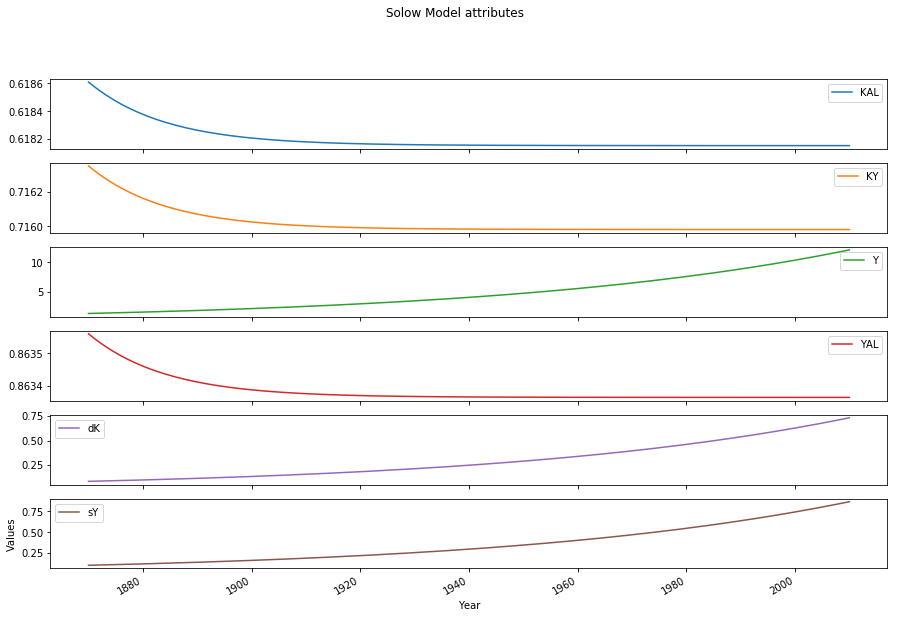

In [137]:
# plotting the data frame 
solowplot.plot.line(title = 'Solow Model attributes', subplots=True,figsize=(15,10))
plt.xlabel('Year')
plt.ylabel('Values')
plt.show()
 

In the above plots you see that returns to capital decrease as it accumulates over the years with the KAL and KY ratios to a steady level. This is beause capital accumulation is dependent on output in the existing period and the depreciation of it over time. The model reaches a steady state where the rate of growth of capital and the growth rate is zero. 

### Graph 1.Wealth Income vs K/Y 
<a name="graph1"></a>

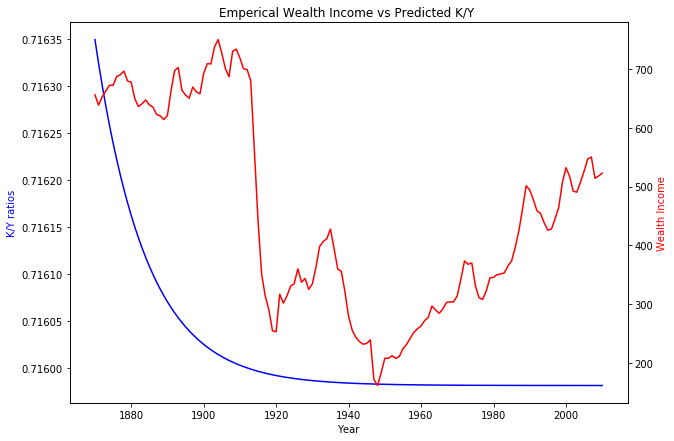

In [138]:
#plotting the predicted K/Y versus emperical welath income ratios 
fig, ax1 = plt.subplots(figsize=(10, 7))

ax1.plot(Year,KY,'b-')
ax1.set_xlabel('Year')
# Make the y-axis label, ticks and tick labels match the line color.
ax1.set_ylabel('K/Y ratios', color='b')
ax1.tick_params('KY', colors='b')

ax2 = ax1.twinx()
ax2.plot(Year,WealthIncome, 'r-')
ax2.set_ylabel('Wealth Income', color='r')
ax2.tick_params('Wealth Income', colors='r')
plt.title("Emperical Wealth Income vs Predicted K/Y ")
plt.show()

Clearly we find that the Solow model does not fit the emperical data from the above graph.We see fluctuations in the emperical wealth income ratios around 1920, 1940s , and then it picks up after the 1980s. In order to account for these fluctuations I introduce shocks into the model. 

<a href="#graph2">Refer to graph 2</a>
<a href="#graph3">Refer to graph 3</a>

# Refinement
<a name="refine"></a>

Now I simulate the model again by introducing shocks. The model predicts that capital accumulation was constant around the steady state until 1914. I create a shock in the capital stocks over the period of WWII assume shcoks lasts for entier period of WWInd worsens as the war progressed. Kis assumed to be 80% of the value of K without shocks.  Similarly I use 60% for 1915 and 40% from 1916-1918 after which K starts to grow.The reason for teh different ratios of K is to replicate the rapid decrease in the values as shown in the graph above. To simulate WWII I used similar method but in order to be consistent with the data I used the K to account for 80% of its value for the entire period. 

In [139]:
years = 141

In [140]:
L2=np.zeros(years)
A2=np.zeros(years)
K2=np.zeros(years)
sY2=np.zeros(years)
dK2=np.zeros(years)
Y2=np.zeros(years)
KY2=np.zeros(years)
YAL2=np.zeros(years)
KAL2=np.zeros(years)

In [141]:
for i in range (years):
    if i==0:
        L2[i]=1/k
        A2[i]=1
        K2[i]=1
        Y2[i]=K2[i]**a*((L2[i]*A2[i])**(1-a))
        sY2[i]=s*Y2[i]
        dK2[i]=d*K2[i]
        KY2[i]=K2[i]/Y2[i]
        YAL2[i]=Y2[i]/(A2[i]*L2[i])
        KAL2[i]=K2[i]/(A2[i]*L2[i])
        
 #shock for 1914       
    elif i==44:
        L2[i]=L2[i-1]*(1+n)
        A2[i]=A2[i-1]*(1+gA)
        K2[i]=(K2[i-1]+(s*Y2[i-1])-(d*K2[i-1]))*0.8
        Y2[i]=K2[i]**a*((L2[i]*A2[i])**(1-a))
        sY2[i]=s*Y2[i]
        dK2[i]=d*K2[i]
        KY2[i]=K2[i]/Y2[i]
        YAL2[i]=Y2[i]/(A2[i]*L2[i])
        KAL2[i]=K2[i]/(A2[i]*L2[i])
   #shock for 1915     
    elif i==45:
        L2[i]=L2[i-1]*(1+n)
        A2[i]=A2[i-1]*(1+gA)
        K2[i]=(K2[i-1]+(s*Y2[i-1])-(d*K2[i-1]))*0.6
        Y2[i]=K2[i]**a*((L2[i]*A2[i])**(1-a))
        sY2[i]=s*Y2[i]
        dK2[i]=d*K2[i]
        KY2[i]=K2[i]/Y2[i]
        YAL2[i]=Y2[i]/(A2[i]*L2[i])
        KAL2[i]=K2[i]/(A2[i]*L2[i])
    #shock for 1916
    elif i==46:
        L2[i]=L2[i-1]*(1+n)
        A2[i]=A2[i-1]*(1+gA)
        K2[i]=(K2[i-1]+(s*Y2[i-1])-(d*K2[i-1]))*0.4
        Y2[i]=K2[i]**a*((L2[i]*A2[i])**(1-a))
        sY2[i]=s*Y2[i]
        dK2[i]=d*K2[i]
        KY2[i]=K2[i]/Y2[i]
        YAL2[i]=Y2[i]/(A2[i]*L2[i])
        KAL2[i]=K2[i]/(A2[i]*L2[i])
        
    #shock for 1917
    elif i==47: 
        L2[i]=L2[i-1]*(1+n)
        A2[i]=A2[i-1]*(1+gA)
        K2[i]=(K2[i-1]+(s*Y2[i-1])-(d*K2[i-1]))*0.4
        Y2[i]=K2[i]**a*((L2[i]*A2[i])**(1-a))
        sY2[i]=s*Y2[i]
        dK2[i]=d*K2[i]
        KY2[i]=K2[i]/Y2[i]
        YAL2[i]=Y2[i]/(A2[i]*L2[i])
        KAL2[i]=K2[i]/(A2[i]*L2[i])
        
      #shock for 1918
    elif i==48: 
        L2[i]=L2[i-1]*(1+n)
        A2[i]=A2[i-1]*(1+gA)
        K2[i]=(K2[i-1]+(s*Y2[i-1])-(d*K2[i-1]))*0.4
        Y2[i]=K2[i]**a*((L2[i]*A2[i])**(1-a))
        sY2[i]=s*Y2[i]
        dK2[i]=d*K2[i]
        KY2[i]=K2[i]/Y2[i]
        YAL2[i]=Y2[i]/(A2[i]*L2[i])
        KAL2[i]=K2[i]/(A2[i]*L2[i])
        
      #WWII shock
    elif i==69: 
        L2[i]=L2[i-1]*(1+n)
        A2[i]=A2[i-1]*(1+gA)
        K2[i]=(K2[i-1]+(s*Y2[i-1])-(d*K2[i-1]))*0.8
        Y2[i]=K2[i]**a*((L2[i]*A2[i])**(1-a))
        sY2[i]=s*Y2[i]
        dK2[i]=d*K2[i]
        KY2[i]=K2[i]/Y2[i]
        YAL2[i]=Y2[i]/(A2[i]*L2[i])
        KAL2[i]=K2[i]/(A2[i]*L2[i])
        
    #WWII shock
    elif i==70:
        L2[i]=L2[i-1]*(1+n)
        A2[i]=A2[i-1]*(1+gA)
        K2[i]=(K2[i-1]+(s*Y2[i-1])-(d*K2[i-1]))*0.8
        Y2[i]=K2[i]**a*((L2[i]*A2[i])**(1-a))
        sY2[i]=s*Y2[i]
        dK2[i]=d*K2[i]
        KY2[i]=K2[i]/Y2[i]
        YAL2[i]=Y2[i]/(A2[i]*L2[i])
        KAL2[i]=K2[i]/(A2[i]*L2[i])
        
    #WWII shock
    elif i==71: 
        L2[i]=L2[i-1]*(1+n)
        A2[i]=A2[i-1]*(1+gA)
        K2[i]=(K2[i-1]+(s*Y2[i-1])-(d*K2[i-1]))*0.8
        Y2[i]=K2[i]**a*((L2[i]*A2[i])**(1-a))
        sY2[i]=s*Y2[i]
        dK2[i]=d*K2[i]
        KY2[i]=K2[i]/Y2[i]
        YAL2[i]=Y2[i]/(A2[i]*L2[i])
        KAL2[i]=K2[i]/(A2[i]*L2[i])
    
    
    #WWII shock
    elif i==72: 
        L2[i]=L2[i-1]*(1+n)
        A2[i]=A2[i-1]*(1+gA)
        K2[i]=(K2[i-1]+(s*Y2[i-1])-(d*K2[i-1]))*0.8
        Y2[i]=K2[i]**a*((L2[i]*A2[i])**(1-a))
        sY2[i]=s*Y2[i]
        dK2[i]=d*K2[i]
        KY2[i]=K2[i]/Y2[i]
        YAL2[i]=Y2[i]/(A2[i]*L2[i])
        KAL2[i]=K2[i]/(A2[i]*L2[i])
        
    #WWII shock
    elif i==73: 
        L2[i]=L2[i-1]*(1+n)
        A2[i]=A2[i-1]*(1+gA)
        K2[i]=(K2[i-1]+(s*Y2[i-1])-(d*K2[i-1]))*0.8
        Y2[i]=K2[i]**a*((L2[i]*A2[i])**(1-a))
        sY2[i]=s*Y2[i]
        dK2[i]=d*K2[i]
        KY2[i]=K2[i]/Y2[i]
        YAL2[i]=Y2[i]/(A2[i]*L2[i])
        KAL2[i]=K2[i]/(A2[i]*L2[i])
        
    #WWII shock
    elif i==74: 
        L2[i]=L2[i-1]*(1+n)
        A2[i]=A2[i-1]*(1+gA)
        K2[i]=(K2[i-1]+(s*Y2[i-1])-(d*K2[i-1]))*0.8
        Y2[i]=K2[i]**a*((L2[i]*A2[i])**(1-a))
        sY2[i]=s*Y2[i]
        dK2[i]=d*K2[i]
        KY2[i]=K2[i]/Y2[i]
        YAL2[i]=Y2[i]/(A2[i]*L2[i])
        KAL2[i]=K2[i]/(A2[i]*L2[i])
     
    #WWII shock   
    elif i==75: 
        L2[i]=L2[i-1]*(1+n)
        A2[i]=A2[i-1]*(1+gA)
        K2[i]=(K2[i-1]+(s*Y2[i-1])-(d*K2[i-1]))*0.8
        Y2[i]=K2[i]**a*((L2[i]*A2[i])**(1-a))
        sY2[i]=s*Y2[i]
        dK2[i]=d*K2[i]
        KY2[i]=K2[i]/Y2[i]
        YAL2[i]=Y2[i]/(A2[i]*L2[i])
        KAL2[i]=K2[i]/(A2[i]*L2[i])

    else:
        L2[i]=L2[i-1]*(1+n)
        A2[i]=A2[i-1]*(1+gA)
        K2[i]=K2[i-1]+(s*Y2[i-1])-(d*K2[i-1])
        Y2[i]=K2[i]**a*((L2[i]*A2[i])**(1-a))
        sY2[i]=s*Y2[i]
        dK2[i]=d*K2[i]
        KY2[i]=K2[i]/Y2[i]
        YAL2[i]=Y2[i]/(A2[i]*L2[i])
        KAL2[i]=K2[i]/(A2[i]*L2[i])

In [142]:
# creating a data frame with the above output 
solowshocksdict={'K with shocks':K2, 'Y with shocks':Y2,'KY with shocks':KY2,'KAL with shocks':KAL2,'YAL with shocks':YAL2}
solowshocksdf=pd.DataFrame(data=solowshocksdict, index =Year)
solowshocksdf.head()# to give the first five rows of the dataframe 

,K with shocks,KAL with shocks,KY with shocks,Y with shocks,YAL with shocks
Year,,,,,
1870,1.000000,0.618610,0.716349,1.395967,0.863560
1871,1.015502,0.618579,0.716324,1.417657,0.863546
1872,1.031248,0.618550,0.716301,1.439686,0.863534
1873,1.047242,0.618523,0.716279,1.462059,0.863522
1874,1.063487,0.618497,0.716258,1.484781,0.863512


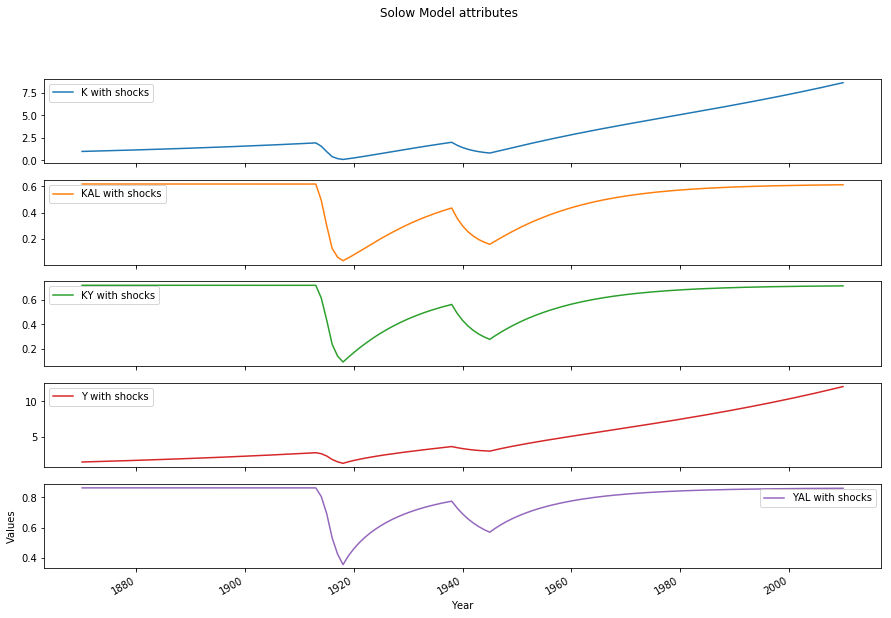

In [143]:
#plotting the new attributes with shocks 
solowshocksdf.plot.line(title = 'Solow Model attributes', subplots=True,figsize=(15,10))
plt.xlabel('Year')
plt.ylabel('Values')
plt.show()
 

The attributes show the trend as before but now accounting for shocks, indicating fluctuations around 1920s and 1940s. 

### Graph 2. Wealth income vs K/Y 
<a name="graph2"></a>

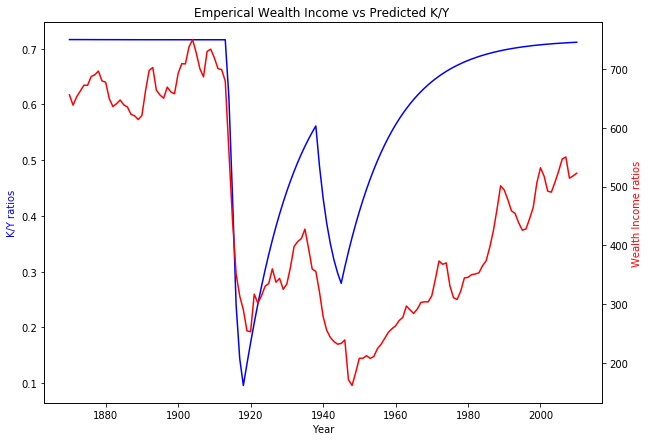

In [144]:
#plotting the predicted K/Y versus emperical welath income ratios 
fig, ax1 = plt.subplots(figsize=(10, 7))

ax1.plot(Year,KY2,'b-')# Assign the y-axis, x-axis and blue line to KY2
ax1.set_xlabel('Year')
# Make the y-axis label, ticks and tick labels match the line color.
ax1.set_ylabel('K/Y ratios', color='b')
ax1.tick_params('KY', colors='b')

ax2 = ax1.twinx()# setting a second axis
ax2.plot(Year,WealthIncome, 'r-')# Assign the y-axis, x-axis and blue line to Wealth Income
ax2.set_ylabel('Wealth Income ratios', color='r')
ax2.tick_params('Wealth Income', colors='r')
plt.title("Emperical Wealth Income vs Predicted K/Y ")
plt.show()

The graph above now shows that the model manages to replicate the data of Piketty when acounting for shocks. However, the model does not fit in terms of levels, especially when you look at post 1950 period. In order to fit in terms of levels adjustment needs to be made to the model. There are two ways these adjustments can be made. Either we adjust the production function or adjust the parameters needed to fit in terms of levels. 

<a href="#graph1">Refer back to graph 1</a>
<a href="#graph3">Refer to graph 3</a>

# CES Model
<a name="CES"></a>

I try to ontroduce a new setup of the model, with constant elasticity of subsititution(CES) with  labor and capital. This is introduced as a parameter. Steady state growth rate of output is shown to increase with CES. This means that degree of factor susbsitution is an indicator of economy's growth potential. By including CES the productin function now looks like : 

 $$Y = [αK^{(σ−1)/σ} + (1 − α)(AL)^{(σ−1)/σ }]^{σ/(σ−1)}$$ 
 
 where sigma is the elasticity of substitution between capital and labor. 
 
 The sigma effects the model in such way that it changes the steady state kappa and the efficient labor in period 1. The steady state kappa is derived to be : 
$$ k=(1 − 𝛼)/((𝑛 + 𝑔𝐴 + 𝛿)/𝑠))^{(𝜎−1)/𝜎)}− 𝛼)^{𝜎/𝜎−1}$$

The value of sigma is assumed to be 1.5. Piketty and Zucman (2014) argue,this value reproduces what has happened in rich countries since the 1870s with the capital shares.I am now going to use this model to see whether it fits the data well. 

In [153]:
#calculating the steady state kappa 
k_ces=((1-a)/(((n+gA+d)/s)**(1.5-1/1.5))-a)**(1.5/(1.5-1))
print(k_ces)

0.010730932091583852


In [154]:
years=141

In [162]:
L3=np.zeros(years)
A3=np.zeros(years)
K3=np.zeros(years)
sY3=np.zeros(years)
dK3=np.zeros(years)
Y3=np.zeros(years)
KY3=np.zeros(years)
YAL3=np.zeros(years)
KAL3=np.zeros(years)

In [163]:
for i in range (years):
    if i==0:
        L3[i]=1/k_ces
        A3[i]=1
        K3[i]=1
        Y3[i]=K3[i]**a*((L3[i]*A3[i])**(1-a))
        sY3[i]=s*Y3[i]
        dK3[i]=d*K3[i]
        KY3[i]=K3[i]/Y3[i]
        YAL3[i]=Y3[i]/(A3[i]*L3[i])
        KAL3[i]=K3[i]/(A3[i]*L3[i])
        
 #shock for 1914       
    elif i==44:
        L3[i]=L3[i-1]*(1+n)
        A3[i]=A3[i-1]*(1+gA)
        K3[i]=(K3[i-1]+(s*Y3[i-1])-(d*K3[i-1]))*0.8
        Y3[i]=K3[i]**a*((L3[i]*A3[i])**(1-a))
        sY3[i]=s*Y3[i]
        dK3[i]=d*K3[i]
        KY3[i]=K3[i]/Y3[i]
        YAL3[i]=Y3[i]/(A3[i]*L3[i])
        KAL3[i]=K3[i]/(A3[i]*L3[i])
   #shock for 1915     
    elif i==45:
        L3[i]=L3[i-1]*(1+n)
        A3[i]=A3[i-1]*(1+gA)
        K3[i]=(K3[i-1]+(s*Y3[i-1])-(d*K3[i-1]))*0.6
        Y3[i]=K3[i]**a*((L3[i]*A3[i])**(1-a))
        sY3[i]=s*Y3[i]
        dK3[i]=d*K3[i]
        KY3[i]=K3[i]/Y3[i]
        YAL3[i]=Y3[i]/(A3[i]*L3[i])
        KAL3[i]=K3[i]/(A3[i]*L3[i])
    #shock for 1916
    elif i==46:
        L3[i]=L3[i-1]*(1+n)
        A3[i]=A3[i-1]*(1+gA)
        K3[i]=(K3[i-1]+(s*Y3[i-1])-(d*K3[i-1]))*0.4
        Y3[i]=K3[i]**a*((L3[i]*A3[i])**(1-a))
        sY3[i]=s*Y3[i]
        dK3[i]=d*K3[i]
        KY3[i]=K3[i]/Y3[i]
        YAL3[i]=Y3[i]/(A3[i]*L3[i])
        KAL3[i]=K3[i]/(A3[i]*L3[i])
        
    #shock for 1917
    elif i==47: 
        L3[i]=L3[i-1]*(1+n)
        A3[i]=A3[i-1]*(1+gA)
        K3[i]=(K3[i-1]+(s*Y3[i-1])-(d*K3[i-1]))*0.4
        Y3[i]=K3[i]**a*((L3[i]*A3[i])**(1-a))
        sY3[i]=s*Y3[i]
        dK3[i]=d*K3[i]
        KY3[i]=K3[i]/Y3[i]
        YAL3[i]=Y3[i]/(A3[i]*L3[i])
        KAL3[i]=K3[i]/(A3[i]*L3[i])
        
      #shock for 1918
    elif i==48: 
        L3[i]=L3[i-1]*(1+n)
        A3[i]=A3[i-1]*(1+gA)
        K3[i]=(K3[i-1]+(s*Y3[i-1])-(d*K3[i-1]))*0.4
        Y3[i]=K3[i]**a*((L3[i]*A3[i])**(1-a))
        sY3[i]=s*Y3[i]
        dK3[i]=d*K3[i]
        KY3[i]=K3[i]/Y3[i]
        YAL3[i]=Y3[i]/(A3[i]*L3[i])
        KAL3[i]=K3[i]/(A3[i]*L3[i])
        
      #WWII shock
    elif i==69: 
        L3[i]=L3[i-1]*(1+n)
        A3[i]=A3[i-1]*(1+gA)
        K3[i]=(K3[i-1]+(s*Y3[i-1])-(d*K3[i-1]))*0.8
        Y3[i]=K3[i]**a*((L3[i]*A3[i])**(1-a))
        sY3[i]=s*Y3[i]
        dK3[i]=d*K3[i]
        KY3[i]=K3[i]/Y3[i]
        YAL3[i]=Y3[i]/(A3[i]*L3[i])
        KAL3[i]=K3[i]/(A3[i]*L3[i])
        
    #WWII shock
    elif i==70:
        L3[i]=L3[i-1]*(1+n)
        A3[i]=A3[i-1]*(1+gA)
        K3[i]=(K3[i-1]+(s*Y3[i-1])-(d*K3[i-1]))*0.8
        Y3[i]=K3[i]**a*((L3[i]*A3[i])**(1-a))
        sY3[i]=s*Y3[i]
        dK3[i]=d*K3[i]
        KY3[i]=K3[i]/Y3[i]
        YAL3[i]=Y3[i]/(A3[i]*L3[i])
        KAL3[i]=K3[i]/(A3[i]*L3[i])
        
    #WWII shock
    elif i==71: 
        L3[i]=L3[i-1]*(1+n)
        A3[i]=A3[i-1]*(1+gA)
        K3[i]=(K3[i-1]+(s*Y3[i-1])-(d*K3[i-1]))*0.8
        Y3[i]=K3[i]**a*((L3[i]*A3[i])**(1-a))
        sY3[i]=s*Y3[i]
        dK3[i]=d*K3[i]
        KY3[i]=K3[i]/Y3[i]
        YAL3[i]=Y3[i]/(A3[i]*L3[i])
        KAL3[i]=K3[i]/(A3[i]*L3[i])
    
    
    #WWII shock
    elif i==72: 
        L3[i]=L3[i-1]*(1+n)
        A3[i]=A3[i-1]*(1+gA)
        K3[i]=(K3[i-1]+(s*Y3[i-1])-(d*K3[i-1]))*0.8
        Y3[i]=K3[i]**a*((L3[i]*A3[i])**(1-a))
        sY3[i]=s*Y3[i]
        dK3[i]=d*K3[i]
        KY3[i]=K3[i]/Y3[i]
        YAL3[i]=Y3[i]/(A3[i]*L3[i])
        KAL3[i]=K3[i]/(A3[i]*L3[i])
        
    #WWII shock
    elif i==73: 
        L3[i]=L3[i-1]*(1+n)
        A3[i]=A3[i-1]*(1+gA)
        K3[i]=(K3[i-1]+(s*Y3[i-1])-(d*K3[i-1]))*0.8
        Y3[i]=K3[i]**a*((L3[i]*A3[i])**(1-a))
        sY3[i]=s*Y3[i]
        dK3[i]=d*K3[i]
        KY3[i]=K3[i]/Y3[i]
        YAL3[i]=Y3[i]/(A3[i]*L3[i])
        KAL3[i]=K3[i]/(A3[i]*L3[i])
        
    #WWII shock
    elif i==74: 
        L3[i]=L3[i-1]*(1+n)
        A3[i]=A3[i-1]*(1+gA)
        K3[i]=(K3[i-1]+(s*Y3[i-1])-(d*K3[i-1]))*0.8
        Y3[i]=K3[i]**a*((L3[i]*A3[i])**(1-a))
        sY3[i]=s*Y3[i]
        dK3[i]=d*K3[i]
        KY3[i]=K3[i]/Y3[i]
        YAL3[i]=Y3[i]/(A3[i]*L3[i])
        KAL3[i]=K3[i]/(A3[i]*L3[i])
     
    #WWII shock   
    elif i==75: 
        L3[i]=L3[i-1]*(1+n)
        A3[i]=A3[i-1]*(1+gA)
        K3[i]=(K3[i-1]+(s*Y3[i-1])-(d*K3[i-1]))*0.8
        Y3[i]=K3[i]**a*((L3[i]*A3[i])**(1-a))
        sY3[i]=s*Y3[i]
        dK3[i]=d*K3[i]
        KY3[i]=K3[i]/Y3[i]
        YAL3[i]=Y3[i]/(A3[i]*L3[i])
        KAL3[i]=K3[i]/(A3[i]*L3[i])
    else:
        L3[i]=L3[i-1]*(1+n)
        A3[i]=A3[i-1]*(1+gA)
        K3[i]=(K3[i-1]+(s*Y3[i-1])-(d*K3[i-1]))
        Y3[i]=K3[i]**a*((L3[i]*A3[i])**(1-a))
        sY3[i]=s*Y3[i]
        dK3[i]=d*K3[i]
        KY3[i]=K3[i]/Y3[i]
        YAL3[i]=Y3[i]/(A3[i]*L3[i])
        KAL3[i]=K3[i]/(A3[i]*L3[i])

In [164]:
# creating a data frame with the above output 
solowCES={'K CES':K3, 'Y CES':Y3,'KY CES':KY3,'KAL CES':KAL3,'YAL CES':YAL3}
solowCESdf=pd.DataFrame(data=solowCES, index =Year)
solowCESdf.head()

,K CES,KAL CES,KY CES,Y CES,YAL CES
Year,,,,,
1870,1.000000,0.010731,0.042869,23.326978,0.250320
1871,2.587161,0.027337,0.082077,31.521224,0.333072
1872,4.627376,0.048147,0.121605,38.052522,0.395927
1873,6.963173,0.071340,0.159795,43.575721,0.446451
1874,9.497320,0.095814,0.196124,48.425084,0.488536


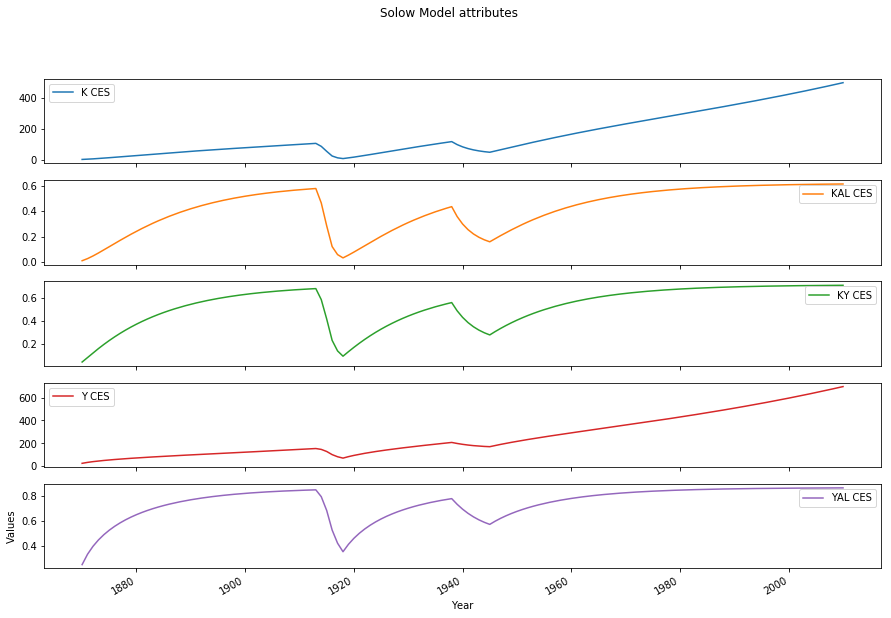

In [165]:
#plotting the new attributes with shocks 
solowCESdf.plot.line(title = 'Solow Model attributes', subplots=True,figsize=(15,10))
plt.xlabel('Year')
plt.ylabel('Values')
plt.show()
 

## Graph 3. Wealth Income vs K/Y
<a name="graph3"></a>

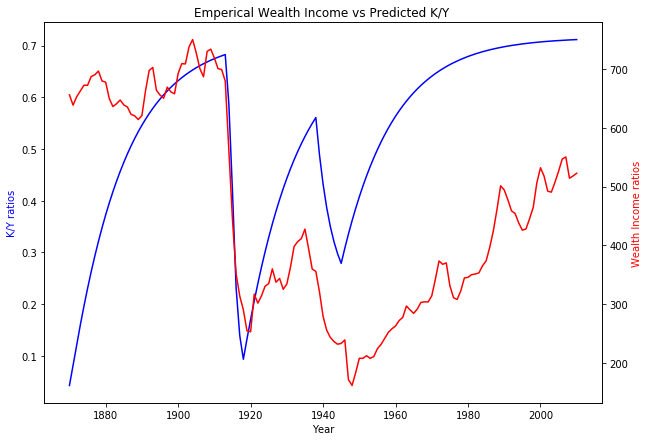

In [159]:
#plotting the predicted K/Y versus emperical welath income ratios 
fig, ax1 = plt.subplots(figsize=(10, 7))

ax1.plot(Year,KY3,'b-')
ax1.set_xlabel('Year')
# Make the y-axis label, ticks and tick labels match the line color.
ax1.set_ylabel('K/Y ratios', color='b')
ax1.tick_params('KY', colors='b')

ax2 = ax1.twinx()
ax2.plot(Year,WealthIncome, 'r-')
ax2.set_ylabel('Wealth Income ratios', color='r')
ax2.tick_params('Wealth Income', colors='r')
plt.title("Emperical Wealth Income vs Predicted K/Y ")
plt.show()

We see the that introducing CES does not make the model fit the data better. Before the period of 1880 and after 1940 the K/Y ratios differe significantly from the emperical data in terms of levels. In the graphs above output and capital accumulate quickly and at higher levels , which may contribute to the high K/Y ratios post 1940. 

<a href="#graph2">Refer back to graph 2</a>
<a href="#graph1">Refer back to graph 1</a>

# Sensitivity Analysis
<a name="sensitivity"></a>

Now I run a simulation , wherein I randomize over one of the parameters and see how the capital income ratios fluctuate with it.I stick with the simple solow model refined for shocks to run the simulaton. The parameter I simulate over is the capital share.  

In [35]:
import random

In [39]:
from scipy import arange 

In [212]:
#setting the number of scenarios 
scenarios=5

In [213]:
# defining variables 
L4=np.zeros(years)
A4=np.zeros(years)
K4=np.zeros(years)
sY4=np.zeros(years)
dK4=np.zeros(years)
Y4=np.zeros(years)
KAL4=np.zeros(years)
KY4=np.zeros(years)

I introduce a loop where I run the model as the number of times set by scenarios. 

In [214]:
# creating an empty data frame
periods=arange(1,142,1) #setting the number of columns, rows
x=pd.DataFrame() # creating first column called periods
print(x)

Empty DataFrame
Columns: []
Index: []


In [222]:
#setting first loop for scenarios 
for n in range (scenarios): 
    for i in range (scenarios):
        def capital ():
            return random.random()# telling python to randmize over capital share between 0 and 1 
    a1= capital()
    
    #running the loop for the solow model for 141 years 
    for i in range (years):
        if i==0:
            L4[i]=1/k
            A4[i]=1
            K4[i]=1
            Y4[i]=K4[i]**a1*((L4[i]*A4[i])**(1-a1))
            sY4[i]=s*Y4[i]
            dK4[i]=d*K4[i]
            KY4[i]=K4[i]/Y4[i]
            KAL4[i]=K4[i]/(A4[i]*L4[i])
        
        elif i==44:
            L4[i]=L4[i-1]*(1+n)
            A4[i]=A4[i-1]*(1+gA)
            K4[i]=(K4[i-1]+(s*Y4[i-1])-(d*K4[i-1]))*0.8
            Y4[i]=K4[i]**a1*((L4[i]*A4[i])**(1-a1))
            sY4[i]=s*Y4[i]
            dK4[i]=d*K4[i]
            KY4[i]=K4[i]/Y4[i]
            KAL4[i]=K4[i]/(A4[i]*L4[i])
        
        elif i==45:
            L4[i]=L4[i-1]*(1+n)
            A4[i]=A4[i-1]*(1+gA)
            K4[i]=(K4[i-1]+(s*Y4[i-1])-(d*K4[i-1]))*0.6
            Y4[i]=K4[i]**a1*((L4[i]*A4[i])**(1-a1))
            sY4[i]=s*Y4[i]
            dK4[i]=d*K4[i]
            KY4[i]=K4[i]/Y4[i]
            KAL4[i]=K4[i]/(A4[i]*L4[i])
            
        elif i==46:
            L4[i]=L4[i-1]*(1+n)
            A4[i]=A4[i-1]*(1+gA)
            K4[i]=(K4[i-1]+(s*Y4[i-1])-(d*K4[i-1]))*0.4
            Y4[i]=K4[i]**a1*((L4[i]*A4[i])**(1-a1))
            sY4[i]=s*Y4[i]
            dK4[i]=d*K4[i]
            KY4[i]=K4[i]/Y4[i]
            KAL4[i]=K4[i]/(A4[i]*L4[i])
           
        elif i==47: 
            L4[i]=L4[i-1]*(1+n)
            A4[i]=A4[i-1]*(1+gA)
            K4[i]=(K4[i-1]+(s*Y4[i-1])-(d*K4[i-1]))*0.4
            Y4[i]=K4[i]**a1*((L4[i]*A4[i])**(1-a1))
            sY4[i]=s*Y4[i]
            dK4[i]=d*K4[i]
            KY4[i]=K4[i]/Y4[i]
            KAL4[i]=K4[i]/(A4[i]*L4[i])
           
        elif i==48: 
            L4[i]=L4[i-1]*(1+n)
            A4[i]=A4[i-1]*(1+gA)
            K4[i]=(K4[i-1]+(s*Y4[i-1])-(d*K4[i-1]))*0.4
            Y4[i]=K4[i]**a1*((L4[i]*A4[i])**(1-a1))
            sY4[i]=s*Y4[i]
            dK4[i]=d*K4[i]
            KY4[i]=K4[i]/Y4[i]
            KAL4[i]=K4[i]/(A4[i]*L4[i])
            
        elif i==69: 
            L4[i]=L4[i-1]*(1+n)
            A4[i]=A4[i-1]*(1+gA)
            K4[i]=(K4[i-1]+(s*Y4[i-1])-(d*K4[i-1]))*0.8
            Y4[i]=K4[i]**a1*((L4[i]*A4[i])**(1-a1))
            sY4[i]=s*Y4[i]
            dK4[i]=d*K4[i]
            KY4[i]=K4[i]/Y4[i]
            KAL4[i]=K4[i]/(A4[i]*L4[i])
            
        
        elif i==70:
            L4[i]=L4[i-1]*(1+n)
            A4[i]=A4[i-1]*(1+gA)
            K4[i]=(K4[i-1]+(s*Y4[i-1])-(d*K4[i-1]))*0.8
            Y4[i]=K4[i]**a1*((L4[i]*A4[i])**(1-a1))
            sY4[i]=s*Y4[i]
            dK4[i]=d*K4[i]
            KY4[i]=K4[i]/Y4[i]
            KAL4[i]=K4[i]/(A4[i]*L4[i])
            
        elif i==71:
            L4[i]=L4[i-1]*(1+n)
            A4[i]=A4[i-1]*(1+gA)
            K4[i]=(K4[i-1]+(s*Y4[i-1])-(d*K4[i-1]))*0.8
            Y4[i]=K4[i]**a1*((L4[i]*A4[i])**(1-a1))
            sY4[i]=s*Y4[i]
            dK4[i]=d*K4[i]
            KY4[i]=K4[i]/Y4[i]
            KAL4[i]=K4[i]/(A4[i]*L4[i])
            
    
        elif i==72: 
            L4[i]=L4[i-1]*(1+n)
            A4[i]=A4[i-1]*(1+gA)
            K4[i]=(K4[i-1]+(s*Y4[i-1])-(d*K4[i-1]))*0.8
            Y4[i]=K4[i]**a1*((L4[i]*A4[i])**(1-a1))
            sY4[i]=s*Y4[i]
            dK4[i]=d*K4[i]
            KY4[i]=K4[i]/Y4[i]
            KAL4[i]=K4[i]/(A4[i]*L4[i])
            
        elif i==73: 
            L4[i]=L4[i-1]*(1+n)
            A4[i]=A4[i-1]*(1+gA)
            K4[i]=(K4[i-1]+(s*Y4[i-1])-(d*K4[i-1]))*0.8
            Y4[i]=K4[i]**a1*((L4[i]*A4[i])**(1-a1))
            sY4[i]=s*Y4[i]
            dK4[i]=d*K4[i]
            KY4[i]=K4[i]/Y4[i]
            KAL4[i]=K4[i]/(A4[i]*L4[i])
            
        elif i==74: 
            L4[i]=L4[i-1]*(1+n)
            A4[i]=A4[i-1]*(1+gA)
            K4[i]=(K4[i-1]+(s*Y4[i-1])-(d*K4[i-1]))*0.8
            Y4[i]=K4[i]**a1*((L4[i]*A4[i])**(1-a1))
            sY4[i]=s*Y4[i]
            dK4[i]=d*K4[i]
            KY4[i]=K4[i]/Y4[i]
            KAL4[i]=K4[i]/(A4[i]*L4[i])
            
        
        elif i==75: 
            L4[i]=L4[i-1]*(1+n)
            A4[i]=A4[i-1]*(1+gA)
            K4[i]=(K4[i-1]+(s*Y4[i-1])-(d*K4[i-1]))*0.8
            Y4[i]=K4[i]**a1*((L4[i]*A4[i])**(1-a1))
            sY4[i]=s*Y4[i]
            dK4[i]=d*K4[i]
            KY4[i]=K4[i]/Y4[i]
            KAL4[i]=K4[i]/(A4[i]*L4[i])
            
        else:
            L4[i]=L4[i-1]*(1+n)
            A4[i]=A4[i-1]*(1+gA)
            K4[i]=(K4[i-1]+(s*Y4[i-1])-(d*K4[i-1]))*0.8
            Y4[i]=K4[i]**a1*((L4[i]*A4[i])**(1-a1))
            sY4[i]=s*Y4[i]
            dK4[i]=d*K4[i]
            KY4[i]=K4[i]/Y4[i]
            KAL4[i]=K4[i]/(A4[i]*L4[i])
            
            
    x['KY with a ='+str(a1)]=KY4#adding the list KY4 into the empty list KY_S created in the beginning for each scenario ran 
    print (a1)# printing the capital shares used 
    
      
        
  
       

0.7754810559675612
0.18215933657409478
0.32578148520921113
0.5162777994794233
0.03986840251274448


In [223]:
x.head()# showing the data frame created

,KY with a =0.7025822075131777,KY with a =0.46653407177426043,KY with a =0.5173656561498801,KY with a =0.9805001233871,KY with a =0.8579099442279134,KY with a =0.25459120584151296,KY with a =0.14541157430347584,KY with a =0.4561979996128319,KY with a =0.6124262477581097,KY with a =0.7844865667073347,KY with a =0.7754810559675612,KY with a =0.18215933657409478,KY with a =0.32578148520921113,KY with a =0.5162777994794233,KY with a =0.03986840251274448
0,0.866890,0.773977,0.793105,0.990678,0.934034,0.618610,0.618610,0.618610,0.618610,0.618610,0.897779,0.675169,0.723385,0.792691,0.630570
1,0.808213,0.474063,0.418092,0.959641,0.718019,0.498457,0.250580,0.164608,0.122633,0.097436,0.850969,0.321941,0.297480,0.363072,0.110437
2,0.754854,0.299248,0.228800,0.929619,0.553769,0.408705,0.113980,0.048062,0.026138,0.015947,0.807398,0.167681,0.133617,0.174628,0.028915
3,0.706323,0.197085,0.132846,0.900579,0.428839,0.341327,0.061979,0.016344,0.006257,0.002752,0.766838,0.099991,0.069966,0.091417,0.015925
4,0.662178,0.137066,0.083688,0.872489,0.333770,0.290479,0.041384,0.006842,0.001768,0.000510,0.729079,0.069942,0.044540,0.053961,0.013737


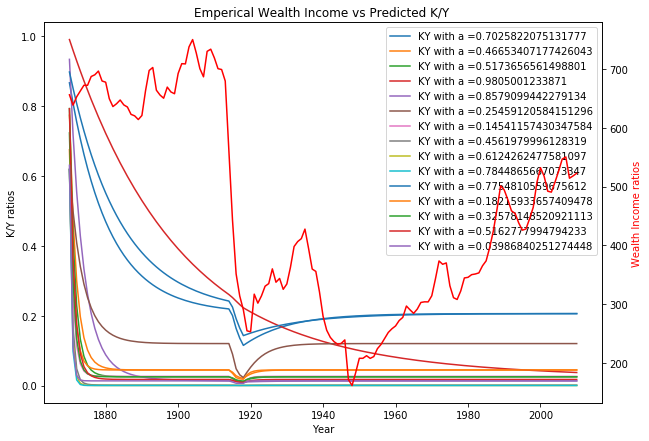

In [224]:
#plotting the predicted K/Y versus emperical welath income ratios 
fig, ax1 = plt.subplots(figsize=(10, 7))

ax1.plot(Year,x)
ax1.set_xlabel('Year')
plt.legend(x.columns)
# Make the y-axis label, ticks and tick labels match the line color.
ax1.set_ylabel('K/Y ratios')
ax1.tick_params('KY')

ax2 = ax1.twinx()
ax2.plot(Year,WealthIncome, 'r-')
ax2.set_ylabel('Wealth Income ratios', color='r')
ax2.tick_params('Wealth Income', colors='r')
plt.title("Emperical Wealth Income vs Predicted K/Y ")
plt.show()

The above graph shows fluctuations in the capital income ratios with respect to the emperical wealth income ratios. There is no claer inference as to which direction would provide a better fit. The best fit in these 10 scenarios is seen to be capital share ratio of 0.98. Which mean the amount of capital in the economy to be 100% . Even though the initial calibration of the model showed good fit, but controlling for other parameters , the model requires unfeasible amount of capital share to fit the emperical data. This implies that the model is not really good predictor as it was first sought out to be. 

# Remarks 
<a name="remarks"></a>

The Solow Model indicates that economies that accumulate capital reach a steady state due as diminishing marginal returns to capital and cannot generate enough output to sustain capital growth. As such the economy also reaches a steady state where the growth rate is zero. In this version of the model , the only way that the economy can grow is through exogenous technological growth. In the attempt to try to fit the UK economic data into the model , we are successful when accounting for trends in the economy. However, the model does not completely fit in terms of levels. Then introducing the CES version of the model we find that the fit is worse post 1940. An intersting observation here was that the K and Y in the economy accumulated quickly and was larger. After running the simulation we find that the capital shares that fit the model better were too high, accounting for almost hundred percent. This contradicts the model's assumption of diminishing marginal returns to capital. Moreover, it is very unlikely that any economy can sustain capital accumulation to the point it accounts for upto hundred percent of the economy. However,it was surprising to see that the simulation showed no clear relationship between the capital share and the fit of the model. Just changing one parameter may not entirely indicate what the economy needs in terms of the parameters for a good fit. This along with other assumptions held in this analysis may have influenced results. 

<a href="#top">back to the top</a>